In [1]:
from cmdstanpy import CmdStanModel
import seaborn as sns
import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


# Task 4. Prior predictive checks

### Adding predictor to the model - weight

In [3]:
weight = d['weight']
mean_weight = weight.mean()
c_weight = weight/mean_weight
d['c_weight'] = abs(c_weight)
d.head()

,height,weight,age,male,c_weight
0,151.765,47.825606,63.0,1,1.063016
1,139.700,36.485807,63.0,0,0.810967
2,136.525,31.864838,65.0,0,0.708257
3,156.845,53.041914,41.0,1,1.178958
4,145.415,41.276872,51.0,0,0.917458


In [4]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [5]:
df = sim.draws_pd()
df

,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,232.163,7.771810,23.208300,240.492,205.397,243.469,265.689,290.555,...,269.018,285.842,277.9850,248.4020,210.396,230.097,236.3910,260.545,249.554,257.983
1,0.0,0.0,154.022,-0.067795,0.086958,154.080,154.040,154.037,154.074,154.076,...,154.168,153.932,153.8550,153.9190,153.849,153.975,153.8390,153.920,154.041,153.920
2,0.0,0.0,169.461,-11.386400,20.358900,190.435,157.600,158.004,173.422,168.958,...,190.605,127.852,185.4820,161.3510,194.210,154.379,174.2700,162.989,152.871,157.864
3,0.0,0.0,158.357,-2.544520,6.415610,165.126,152.330,155.129,150.373,155.037,...,158.710,156.083,157.5660,164.2220,152.158,151.867,160.6320,151.796,157.434,152.508
4,0.0,0.0,158.131,16.710200,9.955320,143.685,164.026,162.351,162.694,183.526,...,195.001,192.642,172.5590,181.8530,178.949,176.072,175.5140,188.589,187.014,173.426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,161.753,12.613000,6.017940,176.400,161.042,171.435,171.196,172.565,...,181.359,163.362,183.3790,176.3960,194.529,177.088,178.7440,191.915,176.690,173.344
996,0.0,0.0,196.362,12.233800,10.413300,211.791,211.478,200.819,207.268,191.384,...,207.005,217.914,217.6870,194.6070,221.962,208.342,191.6680,227.116,209.895,211.516
997,0.0,0.0,172.792,-2.720510,76.805200,133.497,267.002,232.007,178.823,194.065,...,118.963,136.250,215.1980,30.9148,178.061,232.643,81.8568,191.467,108.204,131.681
998,0.0,0.0,126.115,9.871600,23.204300,153.667,138.655,128.957,146.226,162.986,...,131.899,134.069,95.1204,119.2860,165.005,134.331,166.2850,114.570,107.814,144.933


### Plot lines for each sampled slope beta and intercept alpha.

In [6]:
df = df.drop(columns = df.iloc[:,0:5])
df  

,height[1],height[2],height[3],height[4],height[5],height[6],height[7],height[8],height[9],height[10],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,240.492,205.397,243.469,265.689,290.555,260.6250,251.095,252.219000,237.920,268.994,...,269.018,285.842,277.9850,248.4020,210.396,230.097,236.3910,260.545,249.554,257.983
1,154.080,154.040,154.037,154.074,154.076,154.0380,154.036,153.826000,154.164,154.090,...,154.168,153.932,153.8550,153.9190,153.849,153.975,153.8390,153.920,154.041,153.920
2,190.435,157.600,158.004,173.422,168.958,178.7430,117.316,164.932000,114.387,147.733,...,190.605,127.852,185.4820,161.3510,194.210,154.379,174.2700,162.989,152.871,157.864
3,165.126,152.330,155.129,150.373,155.037,162.5640,160.881,162.405000,158.873,149.853,...,158.710,156.083,157.5660,164.2220,152.158,151.867,160.6320,151.796,157.434,152.508
4,143.685,164.026,162.351,162.694,183.526,179.0870,176.506,185.152000,176.514,179.587,...,195.001,192.642,172.5590,181.8530,178.949,176.072,175.5140,188.589,187.014,173.426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,176.400,161.042,171.435,171.196,172.565,177.2400,168.666,172.158000,168.180,177.731,...,181.359,163.362,183.3790,176.3960,194.529,177.088,178.7440,191.915,176.690,173.344
996,211.791,211.478,200.819,207.268,191.384,209.8310,218.084,208.732000,204.025,230.222,...,207.005,217.914,217.6870,194.6070,221.962,208.342,191.6680,227.116,209.895,211.516
997,133.497,267.002,232.007,178.823,194.065,144.0830,185.090,-0.393002,167.491,150.931,...,118.963,136.250,215.1980,30.9148,178.061,232.643,81.8568,191.467,108.204,131.681
998,153.667,138.655,128.957,146.226,162.986,94.7939,136.001,139.206000,168.070,169.801,...,131.899,134.069,95.1204,119.2860,165.005,134.331,166.2850,114.570,107.814,144.933


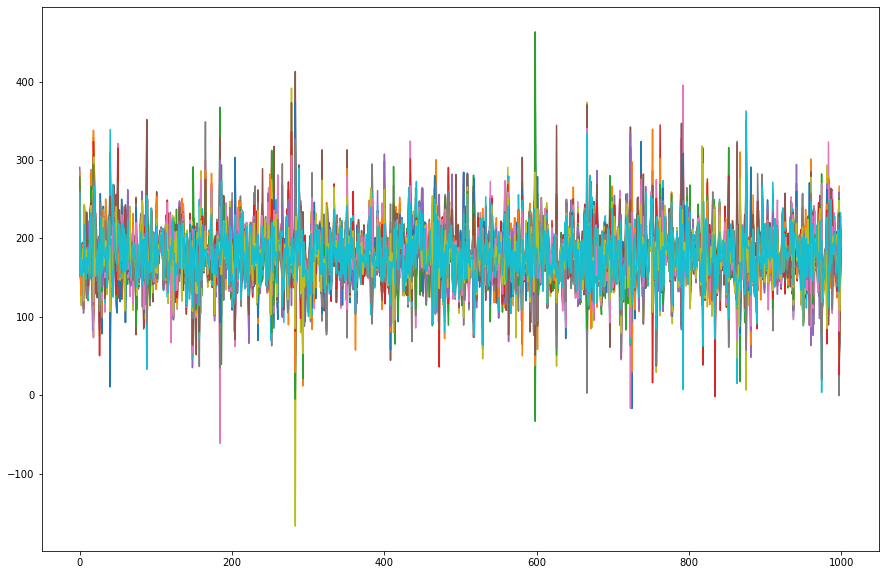

In [14]:
plt.figure(figsize=(15,10))
plt.plot(df)